In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam_data.csv')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


1.Data_Cleaning
2.EDA (exporatiray data Anylasis)
3. Text preprocessing
4. Model buidling
5. Evaluation
6. Improvements
7. website


In [6]:
#dropoing last three columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.sample(5)

,v1,v2
1554,ham,Yeah we do totes. When u wanna?
3955,ham,Haha... dont be angry with yourself... Take it...
1546,ham,Shant disturb u anymore... Jia you...
3313,ham,Oh gei. That happend to me in tron. Maybe ill ...
4462,ham,He said i look pretty wif long hair wat. But i...


In [8]:
# renaming the v1 and v2 columns
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [9]:
df.sample(5)

,target,text
136,ham,He is there. You call and meet him
2680,ham,Solve d Case : A Man Was Found Murdered On &l...
2733,ham,Do Ì_ noe if ben is going?
3512,ham,Staff of placement training in Amrita college.
4871,ham,Hi dis is yijue i would be happy to work wif Ì...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#duplicate values
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2. EDA 

In [17]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
 import matplotlib.pyplot as plt

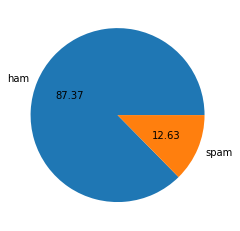

In [20]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [21]:
#data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [25]:
df['num_characters']= df['text'].apply(len)

C:\Users\sinha\AppData\Local\Temp\ipykernel_10100\3630017924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['text'].apply(len)


In [26]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [27]:
#num of words
df['num_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\sinha\AppData\Local\Temp\ipykernel_10100\2339556096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [28]:
# df['text'].apply(lambda x: x.split())

In [29]:
df

,target,text,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [30]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [31]:
df['num_sen'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


C:\Users\sinha\AppData\Local\Temp\ipykernel_10100\1949738812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sen'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [32]:
df

,target,text,num_characters,num_of_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
df.describe()

,target,num_characters,num_of_words,num_sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [34]:
#ham message
df[df['target'] == 0].describe()

,target,num_characters,num_of_words,num_sen
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [35]:
#spam
df[df['target'] == 1].describe()

,target,num_characters,num_of_words,num_sen
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [36]:
import matplotlib.pyplot as plt

(array([  7.,  16.,  23.,  23.,  47., 114., 358.,  62.,   2.,   1.]),
 array([ 13. ,  34.1,  55.2,  76.3,  97.4, 118.5, 139.6, 160.7, 181.8,
        202.9, 224. ]),
 <BarContainer object of 10 artists>)

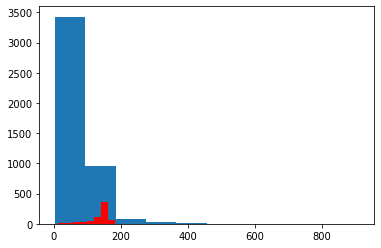

In [37]:
plt.hist(df[df['target']== 0]['num_characters'])
plt.hist(df[df['target']== 1]['num_characters'],color = "red")

In [38]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

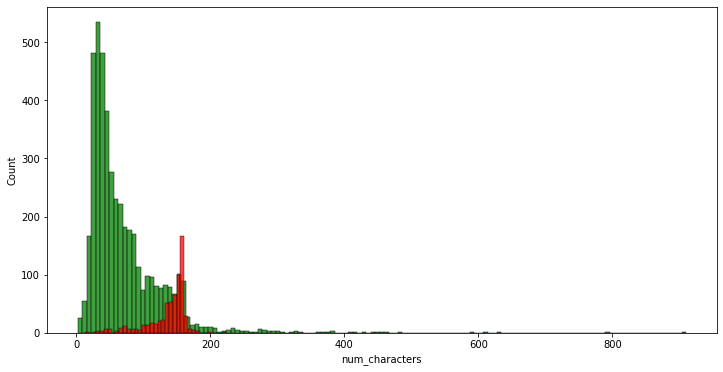

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'],color = 'green')
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

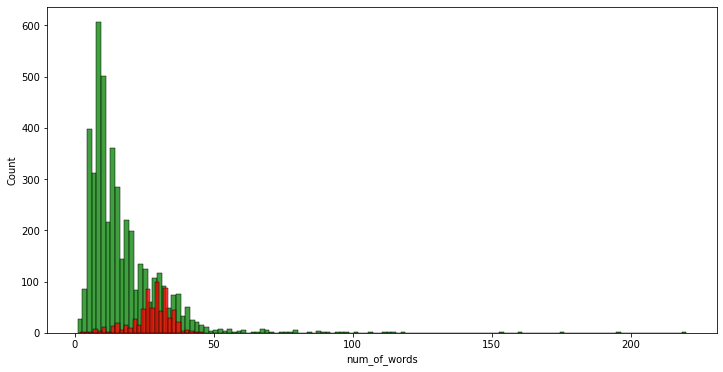

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_of_words'],color = 'green')
sns.histplot(df[df['target'] == 1]['num_of_words'],color = 'red')

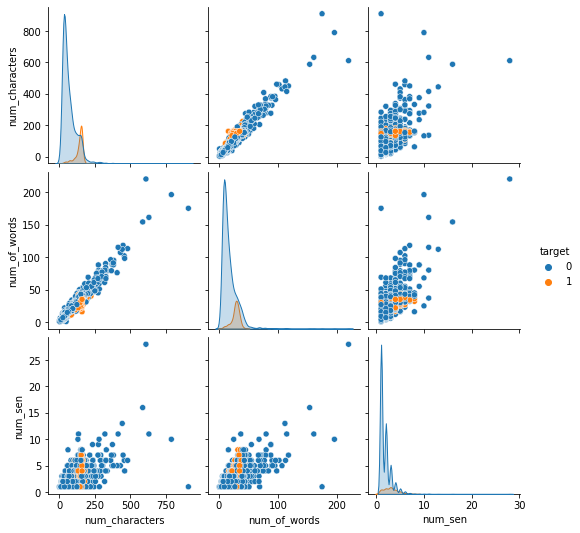

In [41]:
sns.pairplot(df,hue="target")

In [42]:
#corrleation coffiecient
df.corr()

,target,num_characters,num_of_words,num_sen
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_of_words,0.262984,0.965770,1.000000,0.684541
num_sen,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

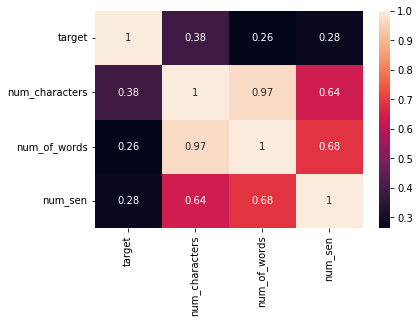

In [43]:
sns.heatmap(df.corr(),annot=True)

# 3.Data Preprocessing
 1.Lowercase
 2.Tokenization
 3.Removing Speical Characters
 4.removing stopword and punctuation
 5.stemming

In [44]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    temp = []
    for i in text:
        if i.isalnum():
            temp.append(i)
        
    return temp

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
transform('hi wolsfjal show  %% tkjs?')

['hi', 'wolsfjal', 'show', 'tkjs']

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    temp = []
    for i in text:
        if i.isalnum():
            temp.append(i)
    text = temp[:]
    temp.clear()
    for j in text:
        if j not in stopwords.words('english') and j not in string.punctuation:
            temp.append(j)
    text = temp[:]
    temp.clear()
    for k in text:
        temp.append(ps.stem(k))
        
    return " ".join(temp) 

In [55]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [56]:
transform('hi how are ? you ^^ ***^* i am good....?')

'hi good'

In [57]:
ps.stem("loving")

'love'

In [58]:
transform('hi i am in loving with you')

'hi love'

In [59]:
df['transformed_text'] = df['text'].apply(transform)

C:\Users\sinha\AppData\Local\Temp\ipykernel_10100\4143821896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform)


In [60]:
df

,target,text,num_characters,num_of_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [61]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500 ,min_font_size=10,background_color='white')


In [62]:
df[df['target']==1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [63]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

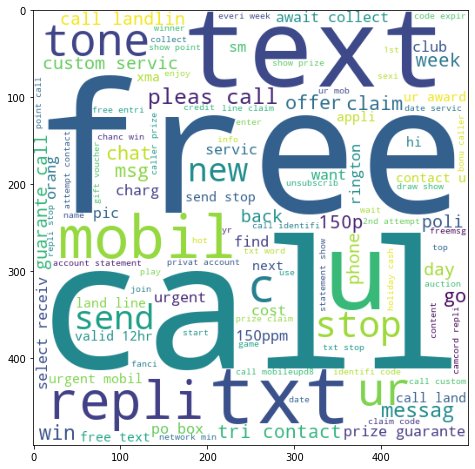

In [64]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)

In [65]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

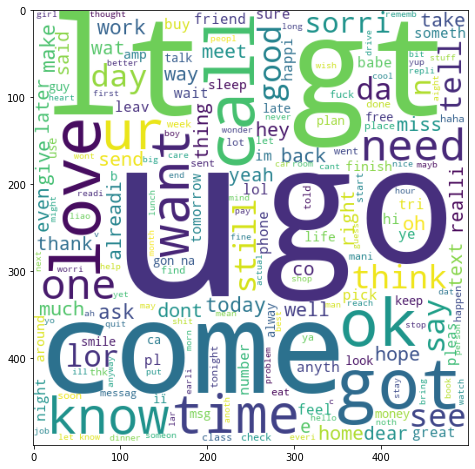

In [66]:
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)

In [67]:
spam_corpus = []
msg_list = df[df['target'] == 1]['transformed_text'].tolist()
for msg in msg_list:
    for word in msg.split():
        spam_corpus.append(word)



In [68]:
len(spam_corpus)

9939

In [69]:
from collections import Counter
count = Counter(spam_corpus).most_common(30)
print(count)

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45)]


In [ ]:
pd.DataFrame(count)[0]
# count_df[0]
# count_df[1]

In [ ]:
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],)

In [70]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [71]:
print(len(ham_corpus))

35394


In [72]:
from collections import Counter
ham_count = Counter(ham_corpus).most_common(30)
print(ham_count)

[('u', 883), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287), ('2', 284), ('come', 275), ('got', 236), ('know', 236), ('like', 234), ('call', 233), ('time', 219), ('ok', 217), ('love', 216), ('good', 213), ('want', 208), ('ur', 197), ('day', 190), ('need', 170), ('one', 165), ('lor', 159), ('4', 156), ('home', 152), ('think', 149), ('see', 147), ('take', 143), ('still', 143), ('da', 138), ('tell', 133), ('make', 129)]


In [ ]:
# sns.barplot(data = (pd.DataFrame(ham_count)[0],pd.DataFrame(ham_count)[1]))

In [51]:
# sns.barplot()

In [73]:
df

,target,text,num_characters,num_of_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# model building

In [116]:
from sklearn.feature_extraction.text import  CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [117]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [118]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
X.shape

(5169, 3000)

In [120]:
Y = df['target'].values

In [121]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [124]:
x_train.shape

(4135, 3000)

In [125]:
x_test.shape

(1034, 3000)

In [126]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [127]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [128]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [131]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [132]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


# slected ---> tfidf -->MNB

In [115]:
#model improvements
# limit the max_features in tfidf

In [133]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))